In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def read_file(any_file):
    # use strip to strip out spaces and trim the line.
    return [line.strip() for line in open(any_file, 'r')]

def get_commits(data):
    sep = 72*'-'
    commits = []
    index = 0
    while index < len(data):
        try:
            # parse each of the commits and put them into a list of commits
            details = data[index + 1].split('|')
            # the author with spaces at end removed.
            commit = {'revision': details[0].strip(),
                'author': details[1].strip(),
                'date': details[2].strip().split(' ')[0],
                'time': details[2].strip().split(' ')[1],
                'number_of_lines': int(details[3].strip().split(' ')[0])
            }
            change_file_end_index = data.index('', index + 1)
            commit['changed_path'] = data[index + 3 : change_file_end_index]
            commit['comment'] = data[change_file_end_index + 1 : 
                    change_file_end_index + 1 + commit['number_of_lines']]
            # add details to the list of commits.
            commits.append(commit)
            index = data.index(sep, index + 1)
        except IndexError:
            index = len(data)
    return commits

def save_commits(commits, any_file):
    my_file = open(any_file, 'w')
    my_file.write("revision,author,date,time,number_of_lines,comment\n")
    for commit in commits:
        my_file.write(commit['revision'] + ',' + commit['author'] +
                ',' + commit['date'] + ',' + commit['time'] + ',' +
				str(commit['number_of_lines']) + ',' + ' '.join(commit['comment']) + '\n')
    my_file.close()

if __name__ == '__main__':
#    open the file - and read all of the lines.
    changes_file = 'changes.txt'
    data = read_file(changes_file)
    print (len(data))
    commits = get_commits(data)
    #save_commits(commits, 'changes.csv')

5255


In [3]:
 df=pd.DataFrame(commits)

In [4]:
df.head()

,author,changed_path,comment,date,number_of_lines,revision,time
0,Thomas,[A /cloud/personal/client-international/androi...,[Renamed folder to the correct name],2015-11-27,1,r1551925,16:57:44
1,Thomas,[M /cloud/personal/client-international/androi...,[Removed unused webview.plan.management and we...,2015-11-27,1,r1551575,09:46:32
2,Vincent,[M /cloud/personal/client-international/androi...,[enable all clients],2015-11-27,1,r1551569,09:38:09
3,Thomas,[M /cloud/personal/client-international/androi...,[Chnaged jira url to htps],2015-11-27,1,r1551558,09:13:26
4,/OU=Domain Control Validated/CN=svn.company.net,[M /cloud/personal/client-international/androi...,[[gradle-release] prepare for next development...,2015-11-27,1,r1551504,07:05:41


In [7]:
df.columns

Index(['author', 'changed_path', 'comment', 'date', 'number_of_lines',
       'revision', 'time'],
      dtype='object')

In [8]:
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_timedelta(df['time'])

In [9]:
name_lines=df.loc[:,['author','number_of_lines']]
tot_lines = name_lines.groupby(['author']).sum()

In [10]:
tot_lines

,number_of_lines
author,
/OU=Domain Control Validated/CN=svn.company.net,24
Alan,8
Dave,2
Freddie,14
Jimmy,154
Nicky,14
Thomas,234
Vincent,80
ajon0002,24


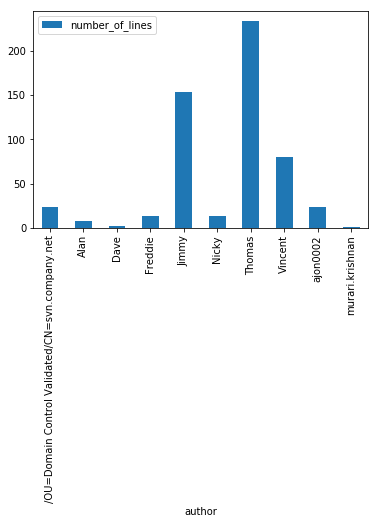

In [11]:
tot_lines.plot(kind="bar")

In [12]:
name_time=df.loc[:,['author','time']]
name_time.groupby(['author']).describe()

time                          \
                                                count                    mean   
author                                                                          
/OU=Domain Control Validated/CN=svn.company.net    24  0 days 13:59:21.291666   
Alan                                                5  0 days 13:02:59.400000   
Dave                                                2  0 days 14:53:40.500000   
Freddie                                             7  0 days 11:20:05.714285   
Jimmy                                             152  0 days 13:18:40.467105   
Nicky                                               5  0 days 15:37:57.800000   
Thomas                                            191  0 days 13:03:42.120418   
Vincent                                            26  0 days 13:06:21.423076   
ajon0002                                            9  0 days 15:04:38.555555   
murari.krishnan                                     1         0 days 15:18:55   

                                                                         \
                                                                    std   
author                                                                    
/OU=Domain Control Validated/CN=svn.company.net  0 days 02:24:34.130646   
Alan                                             0 days 01:49:39.334905   
Dave                                             0 days 07:27:49.350578   
Freddie                                          0 days 03:29:41.941142   
Jimmy                                            0 days 01:48:40.371216   
Nicky                                            0 days 02:42:52.206132   
Thomas                                           0 days 02:28:41.086140   
Vincent                                          0 days 04:13:11.119819   
ajon0002                                         0 days 00:07:02.153144   
murari.krishnan                                                     NaT   

                                                                  \
                                                             min   
author                                                             
/OU=Domain Control Validated/CN=svn.company.net  0 days 07:05:41   
Alan                                             0 days 11:32:02   
Dave                                             0 days 09:37:01   
Freddie                                          0 days 08:12:56   
Jimmy                                            0 days 08:26:25   
Nicky                                            0 days 13:01:18   
Thomas                                           0 days 08:38:12   
Vincent                                          0 days 05:50:12   
ajon0002                                         0 days 14:55:02   
murari.krishnan                                  0 days 15:18:55   

                                                                         \
                                                                    25%   
author                                                                    
/OU=Domain Control Validated/CN=svn.company.net         0 days 13:01:58   
Alan                                                    0 days 11:48:20   
Dave                                             0 days 12:15:20.750000   
Freddie                                                 0 days 09:04:25   
Jimmy                                            0 days 11:57:18.750000   
Nicky                                                   0 days 14:04:49   
Thomas                                           0 days 11:04:56.500000   
Vincent                                          0 days 10:17:28.250000   
ajon0002                                                0 days 15:00:06   
murari.krishnan                                         0 days 15:18:55   

                                                                         \
                                                                    50%   
author  

In [37]:
date_lines=df.loc[:,['date','number_of_lines']]
tot_date=date_lines.groupby(['date']).sum()

In [38]:
tot_date.sort_values('number_of_lines', ascending=False).head()

,number_of_lines
date,
2015-11-26,30
2015-11-02,26
2015-11-20,20
2015-08-04,19
2015-11-12,19


In [39]:
# Avarage number of realeases per day
release_no=date_lines.groupby(['date']).count()
release_no['number_of_lines'].mean()

5.552631578947368

In [40]:
df['number_of_lines'].mean()

1.3151658767772512